In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#查看数据类型
print(pd.DataFrame(data.dtypes))

                               0
Administrative             int64
Administrative_Duration  float64
Informational              int64
Informational_Duration   float64
ProductRelated             int64
ProductRelated_Duration  float64
BounceRates              float64
ExitRates                float64
PageValues               float64
SpecialDay               float64
Month                     object
OperatingSystems           int64
Browser                    int64
Region                     int64
TrafficType                int64
VisitorType               object
Weekend                     bool
Revenue                     bool


In [5]:
#查看缺失值
print(pd.DataFrame(data.isnull().sum()).T)
#发现没有缺失值

   Administrative  Administrative_Duration  Informational  \
0               0                        0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                       0               0                        0   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0            0          0           0           0      0                 0   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        0       0            0            0        0        0  


In [6]:
#简单描述性统计看一下
print(data.describe().round(2).T)

                           count     mean      std  min     25%     50%  \
Administrative           12330.0     2.32     3.32  0.0    0.00    1.00   
Administrative_Duration  12330.0    80.82   176.78  0.0    0.00    7.50   
Informational            12330.0     0.50     1.27  0.0    0.00    0.00   
Informational_Duration   12330.0    34.47   140.75  0.0    0.00    0.00   
ProductRelated           12330.0    31.73    44.48  0.0    7.00   18.00   
ProductRelated_Duration  12330.0  1194.75  1913.67  0.0  184.14  598.94   
BounceRates              12330.0     0.02     0.05  0.0    0.00    0.00   
ExitRates                12330.0     0.04     0.05  0.0    0.01    0.03   
PageValues               12330.0     5.89    18.57  0.0    0.00    0.00   
SpecialDay               12330.0     0.06     0.20  0.0    0.00    0.00   
OperatingSystems         12330.0     2.12     0.91  1.0    2.00    2.00   
Browser                  12330.0     2.36     1.72  1.0    2.00    2.00   
Region                   

相关性：
                         Administrative  Administrative_Duration  \
Administrative                     1.00                     0.60   
Administrative_Duration            0.60                     1.00   
Informational                      0.38                     0.30   
Informational_Duration             0.26                     0.24   
ProductRelated                     0.43                     0.29   
ProductRelated_Duration            0.37                     0.36   
BounceRates                       -0.22                    -0.14   
ExitRates                         -0.32                    -0.21   
PageValues                         0.10                     0.07   
SpecialDay                        -0.09                    -0.07   
OperatingSystems                  -0.01                    -0.01   
Browser                           -0.03                    -0.02   
Region                            -0.01                    -0.01   
TrafficType                       -0.03    

True

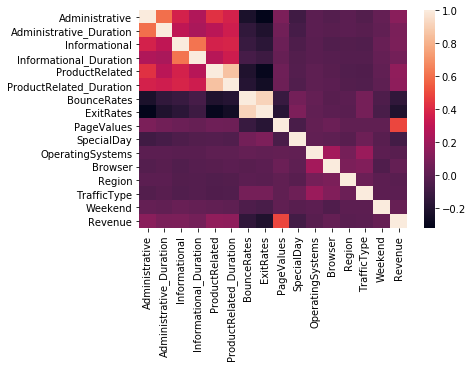

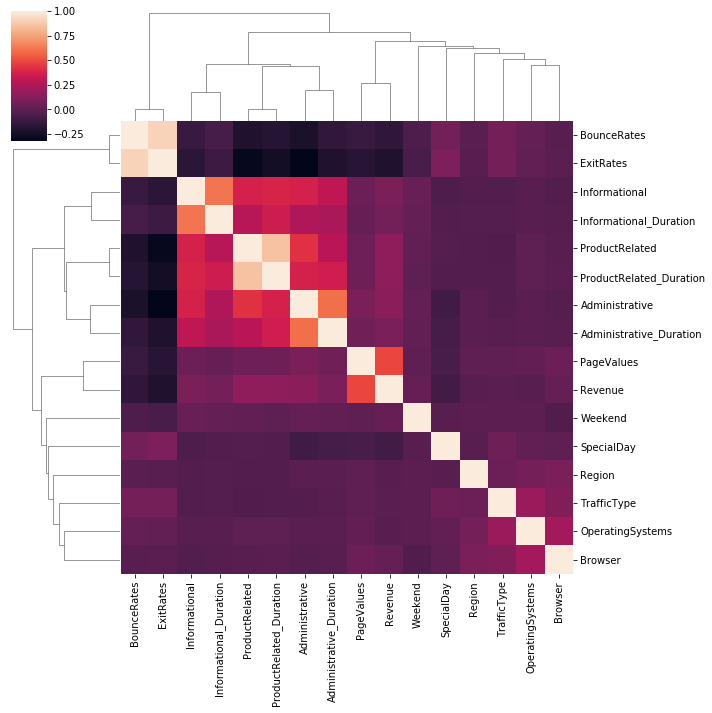

In [7]:
#corr()相关性分析
def Corr(inputfile):
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("相关性：")
    print(data.corr().round(2).T)
    print("相关性热力图：")
    print(sns.heatmap(data.corr()))
    print("分层相关性热力图：")
    print(sns.clustermap(data.corr()))
    return True
Corr('online_shoppers_intention.csv')

In [8]:
# 对object非数值型对象和bool对象编码，onehot编码
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import pandas as pd
#对等级变量编码
X = data.iloc[:,[10,15,16,17]]
X.head()

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False


In [9]:
enc=OneHotEncoder(categories='auto').fit(X)
X1=enc.transform(X).toarray()
X1

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [10]:
enc.get_feature_names()

array(['x0_Aug', 'x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar',
       'x0_May', 'x0_Nov', 'x0_Oct', 'x0_Sep', 'x1_New_Visitor',
       'x1_Other', 'x1_Returning_Visitor', 'x2_False', 'x2_True',
       'x3_False', 'x3_True'], dtype=object)

In [11]:
newdata = pd.concat([data,pd.DataFrame(X1)],axis=1)
newdata.drop(["Month","VisitorType","Weekend","Revenue"],axis=1,inplace=True)
newdata.columns =["Administrative","Administrative_Duration","Informational",
                  "Informational_Duration","ProductRelated",
                  "ProductRelated_Duration","BounceRates","ExitRates",
                  "PageValues","SpecialDay","OperatingSystems",
                  "Browser","Region","TrafficType",
                  "Aug","Dec","Feb","Jul","June","Mar","May","Nov","Oct","Sep",
                  "New_Visitor","Other","Returning_Visitor","Weekend_False","Weekend_True","Revenue_False","Revenue_True"]
newdata.to_csv("new_shoppers_data.csv")

In [12]:
#再看看数据类型
print(pd.DataFrame(newdata.dtypes))

                               0
Administrative             int64
Administrative_Duration  float64
Informational              int64
Informational_Duration   float64
ProductRelated             int64
ProductRelated_Duration  float64
BounceRates              float64
ExitRates                float64
PageValues               float64
SpecialDay               float64
OperatingSystems           int64
Browser                    int64
Region                     int64
TrafficType                int64
Aug                      float64
Dec                      float64
Feb                      float64
Jul                      float64
June                     float64
Mar                      float64
May                      float64
Nov                      float64
Oct                      float64
Sep                      float64
New_Visitor              float64
Other                    float64
Returning_Visitor        float64
Weekend_False            float64
Weekend_True             float64
Revenue_Fa

In [13]:
#去掉Revenue标签列
clu_data=newdata.iloc[:,0:-2]
clu_data.head()
clu_data.to_csv("clu_shoppers_data.csv")

In [14]:
#StandardScaler标准化
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()    #实例化
result=scaler.fit_transform(clu_data) #训练生成均值和方差，并导出结果
result 

array([[-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
        -1.81635987,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -2.43533571,
        -1.81635987,  1.81635987]])

In [15]:
#利用公式标准化
X=(clu_data-clu_data.mean(axis=0))/(clu_data.std(axis=0))
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Weekend_False,Weekend_True
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.590879,-0.457664,1.171425,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.622929,0.573512,1.994529,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.296418,-0.045194,0.142545,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,-1.816286,1.816286


In [16]:
#根据平均轮廓系数选K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in range(2, 10):  
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
#取k=2

For n_clusters = 2 The average silhouette_score is : 0.17629608463064425
For n_clusters = 3 The average silhouette_score is : 0.17108216557538936
For n_clusters = 4 The average silhouette_score is : 0.12417902038066478
For n_clusters = 5 The average silhouette_score is : 0.13117826516796716
For n_clusters = 6 The average silhouette_score is : 0.1406863407985774
For n_clusters = 7 The average silhouette_score is : 0.11302609395825258
For n_clusters = 8 The average silhouette_score is : 0.12596776529043344
For n_clusters = 9 The average silhouette_score is : 0.11571664521282453


In [17]:
#K均值聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X1=np.array(X)
kmeans.fit(X1)
print(kmeans.labels_) #类别
print(kmeans.cluster_centers_) #聚类中心

[1 1 1 ... 0 1 0]
[[ 4.79803793e-02  2.72263881e-02  6.49953029e-02  4.37334226e-02
   2.92276128e-02  1.32781671e-02 -8.44827306e-02 -1.13675992e-01
   2.17984118e-02 -3.04539529e-02  5.16280466e-04 -7.31252519e-02
  -1.25445496e-03 -4.03438805e-03 -8.93500557e-03 -3.58713709e-02
  -4.25572859e-02  6.66581679e-03 -4.61454408e-02  3.60877612e-02
  -5.28202254e-02  7.61191710e-02  2.75547274e-02 -1.52908386e-02
   8.60568010e-02 -5.38160987e-02 -7.16407210e-02 -1.81628621e+00
   1.81628621e+00]
 [-1.45431968e-02 -8.25251332e-03 -1.97005420e-02 -1.32559138e-02
  -8.85909886e-03 -4.02470759e-03  2.56073210e-02  3.44560078e-02
  -6.60725480e-03  9.23081136e-03 -1.56488309e-04  2.21647878e-02
   3.80234287e-04  1.22285193e-03  2.70826421e-03  1.08728696e-02
   1.28994183e-02 -2.02045683e-03  1.39870138e-02 -1.09384590e-02
   1.60101888e-02 -2.30722662e-02 -8.35203533e-03  4.63476274e-03
  -2.60844330e-02  1.63120451e-02  2.17148159e-02  5.50529366e-01
  -5.50529366e-01]]


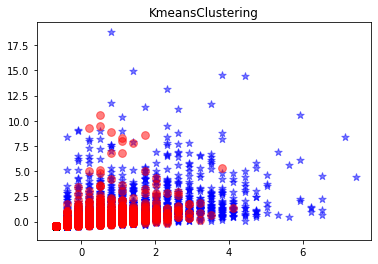

In [143]:
markers = [['*','b'],['o','r']]
for i in range(2):
    members = kmeans.labels_ == i #members是布尔数组
    plt.scatter(X1[members,0],X1[members,1],s = 60,marker=markers[i][0],c=markers[i][1], alpha=0.5)
plt.title('KmeansClustering')
plt.show()
#这效果。。。

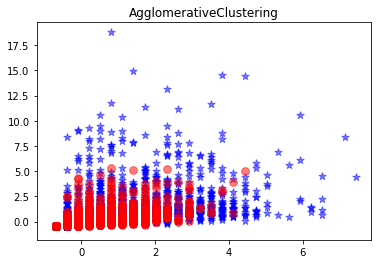

In [142]:
#层次聚类
from sklearn.cluster import AgglomerativeClustering

cls=AgglomerativeClustering(linkage='ward',n_clusters=2).fit(X1)
cls.labels_
markers = [['*','b'],['o','r']]
for i in range(2):
    members = cls.labels_ == i #members是布尔数组
    plt.scatter(X1[members,0],X1[members,1],s = 60,marker=markers[i][0],c=markers[i][1], alpha=0.5)
plt.title('AgglomerativeClustering')
plt.show()

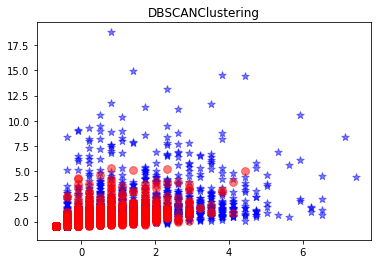

In [144]:
#密度聚类
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=2000,min_samples=1).fit(X1)
dbs.labels_
markers = [['*','b'],['o','r']]
for i in range(2):
    members = cls.labels_ == i #members是布尔数组
    plt.scatter(X1[members,0],X1[members,1],s = 60,marker=markers[i][0],c=markers[i][1], alpha=0.5)
plt.title('DBSCANClustering')
plt.show()

IndexError: list index out of range

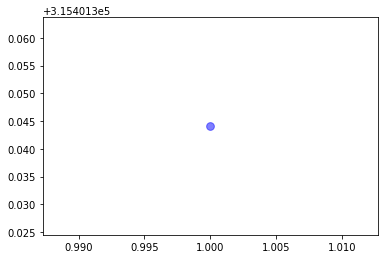

In [31]:
#基于曼哈顿距离选簇数试试吧
def manhattan_distance(x,y):
    return np.sum(abs(x-y))
distance_sum=[]
for N in range(1,10):
    n_clusters=N
cls=KMeans(n_clusters).fit(X1)
cls.cluster_centers_
cls.labels_
distance=0
for i in range(2):
    members = cls.labels_ == i #members是布尔数组
    for d in members:
        distance+=manhattan_distance(np.array(d),cls.cluster_centers_[i])

distance_sum.append(distance)
for N in range(1,10):
    plt.scatter(N,distance_sum[N-1],s=60,marker='o',c='b',alpha=0.5)
plt.plot(range(1,10),distance_sum,'r',label='Fitted line',)
plt.title("Cluster Number and Distance_sum")
plt.show()